### Used links:
- https://pytorch.org/vision/stable/datasets.html#cifar
- https://exerror.com/urllib-error-urlerror-urlopen-error-ssl-certificate_verify_failed-certificate-verify-failed-unable-to-get-local-issuer-certificate/
- https://www.aiworkbox.com/lessons/load-cifar10-dataset-from-pytorch-torchvision
- https://pytorch.org/docs/stable/data.html

### Importing the dataset 

In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [2]:
#checking torch versionn
print(torch.__version__)

1.10.0+cpu


In [3]:
#checking torchvision version
print(torchvision.__version__)

0.11.1+cpu


In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
# initializing training set
cifar = datasets.CIFAR10(root='./data', train=True, download=True, transform=ToTensor())


Files already downloaded and verified


In [6]:
# initializing test set by initiasing  the train parameter to False
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=ToTensor())

Files already downloaded and verified


In [7]:
cifar

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
cifar_testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
len(cifar)

50000

In [10]:
classes = cifar.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
image, label = cifar[0]

In [12]:
image

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [13]:
label

6

In [14]:
try:
    image.shape
    print("checked for shape".format(image.shape))
except AttributeError:
    print("shape not found")
    #code to move to next frame
    

checked for shape


In [15]:
np.reshape(image, (32, 32, 3))

tensor([[[0.2314, 0.1686, 0.1961],
         [0.2667, 0.3843, 0.4667],
         [0.5451, 0.5686, 0.5843],
         ...,
         [0.4980, 0.4941, 0.4980],
         [0.5098, 0.5569, 0.5098],
         [0.4627, 0.4706, 0.4275]],

        [[0.1294, 0.1490, 0.3412],
         [0.4157, 0.4510, 0.4588],
         [0.4471, 0.4118, 0.4196],
         ...,
         [0.4627, 0.5490, 0.5333],
         [0.4706, 0.4196, 0.3451],
         [0.2627, 0.1373, 0.1255]],

        [[0.3804, 0.4353, 0.4824],
         [0.5098, 0.5333, 0.5176],
         [0.4784, 0.4745, 0.4980],
         ...,
         [0.2980, 0.4196, 0.5294],
         [0.5294, 0.5059, 0.4980],
         [0.4667, 0.4902, 0.5255]],

        ...,

        [[0.2824, 0.1725, 0.1647],
         [0.2039, 0.2824, 0.2510],
         [0.2275, 0.2235, 0.3176],
         ...,
         [0.2588, 0.2431, 0.2039],
         [0.1529, 0.1529, 0.1725],
         [0.3412, 0.4471, 0.2275]],

        [[0.3216, 0.1020, 0.0980],
         [0.1333, 0.1608, 0.1922],
         [0.

In [16]:
image, label = cifar[0]
img_shape = image.shape
img_shape

torch.Size([3, 32, 32])

Label (numeric): 6
Label (textual): frog


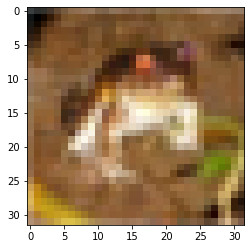

In [17]:
image, label = cifar[0]
plt.imshow(image.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [18]:
torch.manual_seed(43)
val_size = 5000

In [19]:
train_size = len(cifar) - val_size

In [20]:
train_ds, val_ds = random_split(cifar, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [21]:
batch_size=128

In [22]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

In [23]:
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [24]:
test_loader = DataLoader(cifar_testset, batch_size*2, num_workers=4, pin_memory=True)

In [25]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [26]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [27]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [28]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [29]:
device = get_default_device()
device

device(type='cpu')

In [30]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [31]:
class CIFAR10Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_size)
    
#     def __len__(self):
#         return len(self.data)
    
#     def __getitem__(self,index):
#         img_name,label = self.data[index]
#         img_path = os.path.join(self.path, img_name)
#         image = img.imread(img_path)
#         if self.transform is not None:
#             image = self.transform(image)
#         return image, label
    
    
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        return out

In [32]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [33]:
input_size = 3*32*32
output_size = 10

In [34]:
cifar_model = to_device(CIFAR10Model(), device)

In [35]:
history = [evaluate(cifar_model, val_loader)]
history

[{'val_loss': 2.308006763458252, 'val_acc': 0.08956801146268845}]

In [36]:
history += fit(10,0.01, cifar_model, train_loader, val_loader, torch.optim.Adam)

Epoch [0], val_loss: 1.9587, val_acc: 0.2660
Epoch [1], val_loss: 1.9371, val_acc: 0.2795
Epoch [2], val_loss: 1.8385, val_acc: 0.3205
Epoch [3], val_loss: 1.8561, val_acc: 0.3154
Epoch [4], val_loss: 1.8427, val_acc: 0.3301
Epoch [5], val_loss: 1.8246, val_acc: 0.3364
Epoch [6], val_loss: 1.8161, val_acc: 0.3243
Epoch [7], val_loss: 1.8919, val_acc: 0.3104
Epoch [8], val_loss: 1.8133, val_acc: 0.3321
Epoch [9], val_loss: 1.8101, val_acc: 0.3450


In [39]:
history += fit(20, 0.001 , cifar_model, train_loader, val_loader, torch.optim.Adam)

Epoch [0], val_loss: 1.7539, val_acc: 0.3623
Epoch [1], val_loss: 1.7591, val_acc: 0.3606
Epoch [2], val_loss: 1.7444, val_acc: 0.3658
Epoch [3], val_loss: 1.7503, val_acc: 0.3630
Epoch [4], val_loss: 1.7515, val_acc: 0.3622
Epoch [5], val_loss: 1.7505, val_acc: 0.3676
Epoch [6], val_loss: 1.7481, val_acc: 0.3725
Epoch [7], val_loss: 1.7412, val_acc: 0.3694
Epoch [8], val_loss: 1.7326, val_acc: 0.3772
Epoch [9], val_loss: 1.7270, val_acc: 0.3798
Epoch [10], val_loss: 1.7258, val_acc: 0.3814
Epoch [11], val_loss: 1.7239, val_acc: 0.3763
Epoch [12], val_loss: 1.7252, val_acc: 0.3816
Epoch [13], val_loss: 1.7252, val_acc: 0.3721
Epoch [14], val_loss: 1.7324, val_acc: 0.3737
Epoch [15], val_loss: 1.7263, val_acc: 0.3727
Epoch [16], val_loss: 1.7240, val_acc: 0.3787
Epoch [17], val_loss: 1.7190, val_acc: 0.3756
Epoch [18], val_loss: 1.7240, val_acc: 0.3740
Epoch [19], val_loss: 1.7151, val_acc: 0.3794


In [43]:
history += fit(10, 0.00001, cifar_model, train_loader, val_loader, torch.optim.Adam)

Epoch [0], val_loss: 1.7140, val_acc: 0.3798
Epoch [1], val_loss: 1.7137, val_acc: 0.3796
Epoch [2], val_loss: 1.7137, val_acc: 0.3794
Epoch [3], val_loss: 1.7134, val_acc: 0.3802
Epoch [4], val_loss: 1.7135, val_acc: 0.3796
Epoch [5], val_loss: 1.7135, val_acc: 0.3794
Epoch [6], val_loss: 1.7132, val_acc: 0.3796
Epoch [7], val_loss: 1.7133, val_acc: 0.3791
Epoch [8], val_loss: 1.7132, val_acc: 0.3789
Epoch [9], val_loss: 1.7132, val_acc: 0.3804


In [44]:
history += fit(10, 0.000001, cifar_model, train_loader, val_loader, torch.optim.Adam)

Epoch [0], val_loss: 1.7132, val_acc: 0.3804
Epoch [1], val_loss: 1.7132, val_acc: 0.3804
Epoch [2], val_loss: 1.7132, val_acc: 0.3804
Epoch [3], val_loss: 1.7132, val_acc: 0.3804
Epoch [4], val_loss: 1.7132, val_acc: 0.3804
Epoch [5], val_loss: 1.7132, val_acc: 0.3798
Epoch [6], val_loss: 1.7132, val_acc: 0.3802
Epoch [7], val_loss: 1.7131, val_acc: 0.3802
Epoch [8], val_loss: 1.7132, val_acc: 0.3802
Epoch [9], val_loss: 1.7131, val_acc: 0.3804


In [55]:
history += fit(20, 0.01, cifar_model, train_loader, val_loader, torch.optim.Adam)

Epoch [0], val_loss: 1.7908, val_acc: 0.3466
Epoch [1], val_loss: 1.7908, val_acc: 0.3507
Epoch [2], val_loss: 1.7861, val_acc: 0.3542
Epoch [3], val_loss: 1.7952, val_acc: 0.3511
Epoch [4], val_loss: 1.8180, val_acc: 0.3346
Epoch [5], val_loss: 1.7649, val_acc: 0.3644
Epoch [6], val_loss: 1.7605, val_acc: 0.3672
Epoch [7], val_loss: 1.7746, val_acc: 0.3594
Epoch [8], val_loss: 1.7702, val_acc: 0.3638
Epoch [9], val_loss: 1.7760, val_acc: 0.3662
Epoch [10], val_loss: 1.8061, val_acc: 0.3474
Epoch [11], val_loss: 1.7823, val_acc: 0.3461
Epoch [12], val_loss: 1.7758, val_acc: 0.3684
Epoch [13], val_loss: 1.7468, val_acc: 0.3719
Epoch [14], val_loss: 1.7411, val_acc: 0.3706
Epoch [15], val_loss: 1.7521, val_acc: 0.3608
Epoch [16], val_loss: 1.7548, val_acc: 0.3710
Epoch [17], val_loss: 1.7709, val_acc: 0.3665
Epoch [18], val_loss: 1.8501, val_acc: 0.3314
Epoch [19], val_loss: 1.8123, val_acc: 0.3554


In [45]:
evaluate(cifar_model, test_loader)

{'val_loss': 1.6693696975708008, 'val_acc': 0.39531248807907104}

In [49]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [50]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

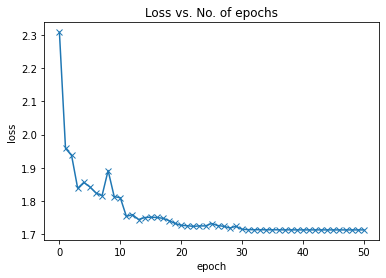

In [51]:
plot_losses(history)

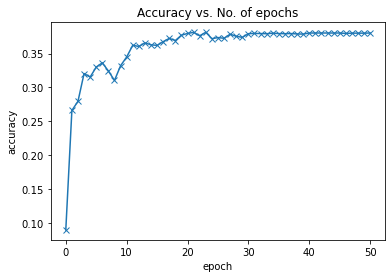

In [52]:
plot_accuracies(history)

In [53]:
# test-the-model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = cifar_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 38.02 %


In [54]:
evaluate(cifar_model, test_loader)

{'val_loss': 1.6693696975708008, 'val_acc': 0.39531248807907104}